## Problem Statement
Car dealerships generate large volumes of sales transaction data, but often lack a clear understanding of what differentiates high-value sales from standard sales.

Identifying the characteristics associated with premium sales transactions can help dealerships:
1. Understand customer and sales behavior
2. Evaluate salesperson performance
3. Design targeted sales strategies and pricing policies

   
## Objective
The objective of this project is to build a classification model that categorizes completed car sales transactions as Premium Sales or Standard Sales using customer demographics, purchase characteristics, and sales-related attributes.

Rather than predicting future outcomes, the model focuses on:
1. Discovering patterns associated with high-value transactions
2. Explaining the factors that contribute to premium sales
3. Supporting data-driven decision-making for sales strategy optimization

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
customers = pd.read_csv("C:/Users/sreya/Downloads/Customers.csv")
sales = pd.read_csv("C:/Users/sreya/Downloads/Sales.csv")

In [3]:
customers.head()

,Customer_ID,Name,Gender,Age,Phone,Email,City
0,CU0001,Jill Snyder,Male,49,(527)170-6357,timothy92@yahoo.com,Juliabury
1,CU0002,Nicholas Foster,Male,23,324-959-9856x281,cochrancarlos@berry.info,Wrightport
2,CU0003,Courtney Robbins,Male,60,461.428.6407,donna01@yahoo.com,Lake Zacharyburgh
3,CU0004,Blake Barry,Male,67,119-340-1448x571,sandra08@yahoo.com,Ramirezburgh
4,CU0005,Claudia Hardin,Female,31,514-684-2974x378,caitlindavis@bradley.org,Lake Tamara


In [4]:
sales.head()

,Sale_ID,Customer_ID,Car_ID,Sale_Date,Quantity,Sale_Price,Payment_Method,Salesperson
0,S00001,CU1241,C0214,2025-03-28,3,73293.19,Installment,Ashley Ramos
1,S00002,CU0100,C0202,2024-02-12,3,32681.20,Cash,Pamela Blair
2,S00003,CU1690,C0228,2023-02-26,2,53530.92,Credit,Sergio Lee
3,S00004,CU0534,C0231,2024-06-21,1,89816.61,Cash,Mary Johnston
4,S00005,CU1153,C0071,2023-12-21,2,77590.86,Installment,Ricardo Garcia


##### Now we will do inner join of both the tables so as to get a overall data from both the tables together.

In [6]:
df = pd.merge(customers, sales, on="Customer_ID", how="inner")

In [7]:
df

,Customer_ID,Name,Gender,Age,Phone,Email,City,Sale_ID,Car_ID,Sale_Date,Quantity,Sale_Price,Payment_Method,Salesperson
0,CU0001,Jill Snyder,Male,49,(527)170-6357,timothy92@yahoo.com,Juliabury,S01088,C0052,2023-12-04,1,41592.07,Installment,Alexander Munoz
1,CU0001,Jill Snyder,Male,49,(527)170-6357,timothy92@yahoo.com,Juliabury,S01342,C0459,2025-10-15,2,78144.44,Installment,Deborah Ross
2,CU0001,Jill Snyder,Male,49,(527)170-6357,timothy92@yahoo.com,Juliabury,S04261,C0428,2025-03-25,2,67271.69,Installment,Matthew Boyle
3,CU0002,Nicholas Foster,Male,23,324-959-9856x281,cochrancarlos@berry.info,Wrightport,S01259,C0362,2023-12-25,3,97399.42,Credit,Robert Thompson
4,CU0002,Nicholas Foster,Male,23,324-959-9856x281,cochrancarlos@berry.info,Wrightport,S03250,C0022,2025-08-02,1,91701.99,Credit,Rebecca Ross
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CU1997,Jonathan Moss,Male,37,(228)632-1464x49003,marywolfe@yahoo.com,Thomasburgh,S07374,C0314,2024-05-05,2,89359.43,Cash,Corey James
9996,CU1997,Jonathan Moss,Male,37,(228)632-1464x49003,marywolfe@yahoo.com,Thomasburgh,S09487,C0428,2024-01-16,2,64973.51,Cash,Melanie Meyer
9997,CU1998,Daniel White,Female,43,+1-265-519-9936x2148,adamreyes@maxwell.com,North Carmen,S04539,C0413,2024-08-26,2,65961.09,Credit,Cindy Pacheco
9998,CU1999,Ryan Bell,Male,28,(178)089-3384x038,danielwalker@martinez.com,North Katherine,S05962,C0104,2025-09-11,2,42384.44,Cash,Natasha Ross


In [9]:
df.shape

(10000, 14)

##### So, here we made a table called as df in which there are combined data of both sales and customers table on which we are going to solve our problem.

In [11]:
df.columns.to_list()

['Customer_ID',
 'Name',
 'Gender',
 'Age',
 'Phone',
 'Email',
 'City',
 'Sale_ID',
 'Car_ID',
 'Sale_Date',
 'Quantity',
 'Sale_Price',
 'Payment_Method',
 'Salesperson']

In [12]:
df.dtypes

Customer_ID        object
Name               object
Gender             object
Age                 int64
Phone              object
Email              object
City               object
Sale_ID            object
Car_ID             object
Sale_Date          object
Quantity            int64
Sale_Price        float64
Payment_Method     object
Salesperson        object
dtype: object

##### Here we can see that the Sale_Date column in of object datatype. so we have to  now find out why it is showing as object and have to convert it as datetime datatype.

In [14]:
df['Sale_Date'].nunique ()

1095

In [15]:
df['Sale_Date'].unique()

array(['2023-12-04', '2025-10-15', '2025-03-25', ..., '2024-06-14',
       '2025-08-09', '2024-02-21'], dtype=object)

In [23]:
df['Sale_Date'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Sale_Date, Length: 10000, dtype: bool

In [24]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'], format='%Y-%m-%d')

In [25]:
df.dtypes

Customer_ID               object
Name                      object
Gender                    object
Age                        int64
Phone                     object
Email                     object
City                      object
Sale_ID                   object
Car_ID                    object
Sale_Date         datetime64[ns]
Quantity                   int64
Sale_Price               float64
Payment_Method            object
Salesperson               object
dtype: object

##### So we have now converted the Sale_Date Column from object datatype to datetime format.

## Creating Target Variable

In [26]:
# Calculate the 75th percentile of Sale_Price
premium_threshold = df['Sale_Price'].quantile(0.75)

# Create target variable
df['Premium_Sale'] = (df['Sale_Price'] >= premium_threshold).astype(int)

In [27]:
df

,Customer_ID,Name,Gender,Age,Phone,Email,City,Sale_ID,Car_ID,Sale_Date,Quantity,Sale_Price,Payment_Method,Salesperson,Premium_Sale
0,CU0001,Jill Snyder,Male,49,(527)170-6357,timothy92@yahoo.com,Juliabury,S01088,C0052,2023-12-04,1,41592.07,Installment,Alexander Munoz,0
1,CU0001,Jill Snyder,Male,49,(527)170-6357,timothy92@yahoo.com,Juliabury,S01342,C0459,2025-10-15,2,78144.44,Installment,Deborah Ross,0
2,CU0001,Jill Snyder,Male,49,(527)170-6357,timothy92@yahoo.com,Juliabury,S04261,C0428,2025-03-25,2,67271.69,Installment,Matthew Boyle,0
3,CU0002,Nicholas Foster,Male,23,324-959-9856x281,cochrancarlos@berry.info,Wrightport,S01259,C0362,2023-12-25,3,97399.42,Credit,Robert Thompson,1
4,CU0002,Nicholas Foster,Male,23,324-959-9856x281,cochrancarlos@berry.info,Wrightport,S03250,C0022,2025-08-02,1,91701.99,Credit,Rebecca Ross,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CU1997,Jonathan Moss,Male,37,(228)632-1464x49003,marywolfe@yahoo.com,Thomasburgh,S07374,C0314,2024-05-05,2,89359.43,Cash,Corey James,1
9996,CU1997,Jonathan Moss,Male,37,(228)632-1464x49003,marywolfe@yahoo.com,Thomasburgh,S09487,C0428,2024-01-16,2,64973.51,Cash,Melanie Meyer,0
9997,CU1998,Daniel White,Female,43,+1-265-519-9936x2148,adamreyes@maxwell.com,North Carmen,S04539,C0413,2024-08-26,2,65961.09,Credit,Cindy Pacheco,0
9998,CU1999,Ryan Bell,Male,28,(178)089-3384x038,danielwalker@martinez.com,North Katherine,S05962,C0104,2025-09-11,2,42384.44,Cash,Natasha Ross,0


##### The dataset does not contain a predefined label, so the target variable was created using business logic. Sales with prices in the top 25% were labeled as Premium, and the rest as Standard, using a percentile-based threshold to avoid the effect of extreme values.

## Checking and handelling of null values

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer_ID     10000 non-null  object        
 1   Name            10000 non-null  object        
 2   Gender          10000 non-null  object        
 3   Age             10000 non-null  int64         
 4   Phone           10000 non-null  object        
 5   Email           10000 non-null  object        
 6   City            10000 non-null  object        
 7   Sale_ID         10000 non-null  object        
 8   Car_ID          10000 non-null  object        
 9   Sale_Date       10000 non-null  datetime64[ns]
 10  Quantity        10000 non-null  int64         
 11  Sale_Price      10000 non-null  float64       
 12  Payment_Method  10000 non-null  object        
 13  Salesperson     10000 non-null  object        
 14  Premium_Sale    10000 non-null  int32         
dtypes: 

<Axes: >

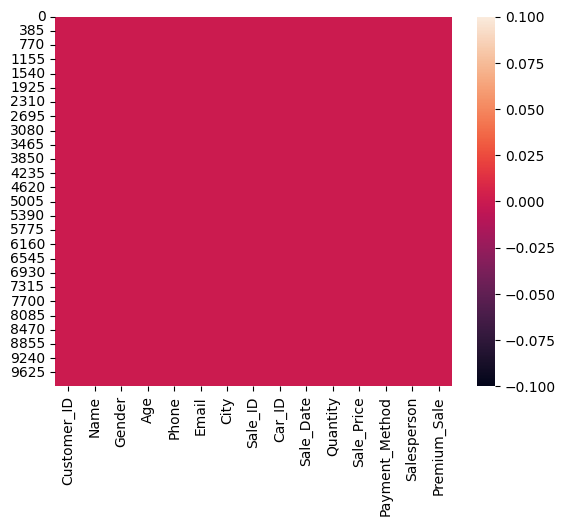

In [29]:
sns.heatmap(df.isnull())

##### As we can check here both in textual way and in visualization way, there is no null values present in the dataset.

## Feature Selection

In [30]:
df_model = df.drop(
    columns=[
        'Customer_ID', 'Sale_ID', 'Car_ID',
        'Name', 'Phone', 'Email',
        'Sale_Price'
    ]
)

In [31]:
print(df.shape)
print(df_model.shape)

(10000, 15)
(10000, 8)


##### We have done the selection of features here in which we have dropped some certain columns like all the IDs, name, Phone number, emails and sale price.

We have dropped these columns Because:
1. IDs don’t help prediction

2. Personal identifiers are irrelevant

3. Sale_Price causes data leakage

## Feature Engineering

#### Sale Time Features

In [33]:
df_model['Sale_Month'] = df['Sale_Date'].dt.month
df_model['Sale_Weekday'] = df['Sale_Date'].dt.weekday

#### Customer Segmentation Features

In [34]:
df_model['Senior_Customer'] = (df['Age'] >= 45).astype(int)

#### Purchase Behaviours of customers

In [35]:
df_model['Bulk_Buyer'] = (df['Quantity'] > 1).astype(int)

## EDA 

## Premium Sales by Payment Method

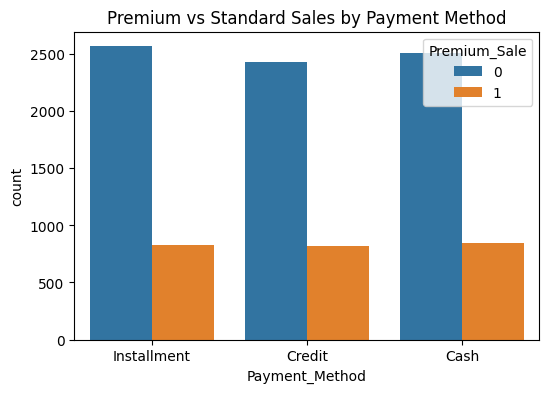

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='Payment_Method', hue='Premium_Sale', data=df)
plt.title("Premium vs Standard Sales by Payment Method")
plt.show()

##### Payment method does not significantly influence whether a sale is premium or standard; premium uptake remains consistently lower across all payment options

## Age vs Premium Sale

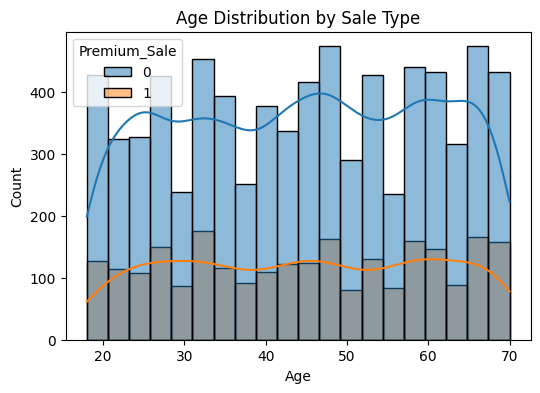

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', hue='Premium_Sale', kde=True, bins=20)
plt.title("Age Distribution by Sale Type")
plt.show()

##### Age has a weak influence on whether a customer chooses a premium sale. While middle-aged customers show slightly higher premium activity, premium and standard sales largely overlap across all age groups.

# Separating features and label

In [45]:
X = df_model.drop(columns=['Premium_Sale', 'Sale_Date'])
y = df_model['Premium_Sale']

In [47]:
y

0       0
1       0
2       0
3       1
4       1
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Premium_Sale, Length: 10000, dtype: int32

In [48]:
X

,Gender,Age,City,Quantity,Payment_Method,Salesperson,Sale_Month,Sale_Weekday,Senior_Customer,Bulk_Buyer
0,Male,49,Juliabury,1,Installment,Alexander Munoz,12,0,1,0
1,Male,49,Juliabury,2,Installment,Deborah Ross,10,2,1,1
2,Male,49,Juliabury,2,Installment,Matthew Boyle,3,1,1,1
3,Male,23,Wrightport,3,Credit,Robert Thompson,12,0,0,1
4,Male,23,Wrightport,1,Credit,Rebecca Ross,8,5,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,Male,37,Thomasburgh,2,Cash,Corey James,5,6,0,1
9996,Male,37,Thomasburgh,2,Cash,Melanie Meyer,1,1,0,1
9997,Female,43,North Carmen,2,Credit,Cindy Pacheco,8,0,0,1
9998,Male,28,North Katherine,2,Cash,Natasha Ross,9,3,0,1


## Separate Features type

In [49]:
numeric_features = ['Age', 'Quantity', 'Sale_Month', 'Sale_Weekday']
categorical_features = [
    'Gender', 'City', 'Payment_Method',
    'Salesperson', 'Senior_Customer', 'Bulk_Buyer'
]

##### Here we have separated the features into numerical and categorial column

## Creating a pipeline for Encoding of columns and scaling it

In [69]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(
            drop='first',
            handle_unknown='ignore'   
        ), categorical_features)
    ]
)

## Checking and solving class imbalance issue

In [53]:
y.value_counts()

Premium_Sale
0    7500
1    2500
Name: count, dtype: int64

##### Here we can see that there is class imbalance issue existing. we can solve it by techniques like SMOTE.

## Train Test Split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

## Creating an evaluation function for evaluating the models

In [67]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{'='*40}")
    print(f"Performance Metrics for {model_name}")
    print(f"{'='*40}")

    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

### Modelling

In [70]:
# Logistic Regression

log_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Random Forest
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [71]:
evaluate_model(log_model, X_test, y_test, "Logistic Regression")


Performance Metrics for Logistic Regression
Accuracy : 0.7475
Precision: 0.3684210526315789
Recall   : 0.014
F1 Score : 0.02697495183044316
ROC-AUC  : 0.4833573333333333

Confusion Matrix:
[[1488   12]
 [ 493    7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1500
           1       0.37      0.01      0.03       500

    accuracy                           0.75      2000
   macro avg       0.56      0.50      0.44      2000
weighted avg       0.66      0.75      0.65      2000



In [72]:
evaluate_model(rf_model, X_test, y_test, "Random Forest")


Performance Metrics for Random Forest
Accuracy : 0.744
Precision: 0.3235294117647059
Recall   : 0.022
F1 Score : 0.04119850187265917
ROC-AUC  : 0.4864586666666667

Confusion Matrix:
[[1477   23]
 [ 489   11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1500
           1       0.32      0.02      0.04       500

    accuracy                           0.74      2000
   macro avg       0.54      0.50      0.45      2000
weighted avg       0.64      0.74      0.65      2000



##### Both Logistic Regression and Random Forest achieve similar overall accuracy; however, both models struggle to correctly identify premium sales due to class imbalance. Logistic Regression is selected as the preferred model because it provides comparable performance with better interpretability and lower complexity. The results indicate that model performance is limited by data imbalance rather than model choice, suggesting the need for techniques such as SMOTE, class weighting, or threshold tuning to improve recall for premium sales.

## Dumping of the best model

In [75]:
import joblib

In [76]:
joblib.dump(log_model, "logistic_regression_premium_sale_model.pkl")

['logistic_regression_premium_sale_model.pkl']

##### We have successfully dumped and saved the model.